# **Assignment 3**
### **Abstract**
In this study I investigate Bisection method for the formula of spherically symmetric flow of an ideal gas onto black hole. Given some radius $r$, I computed values of Mach number $M$. Also, it was defined how number of iterations and error are related using the plot.

### **Introduction**
The estimated roots of equations can be discovered using computational approaches by building recursively convergent sequences. Methods examined in the study include bisection method. It is one of the most relible technique because it cannot diverge. However, it gives only 1 solution in the given guessing interval.

### **Method**
First I import all the necessary libraries and define function **mach(M,r)**. Then, I define the function **bsec** which is used as the method of computing the solution. Variables of the function bsec are x1 - lower boundary, x2 - upper boundary, r - radius, p - error, imax - maximum number of iterations.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
#function mach represents the formula of spherically symmetric flow of an ideal gas onto black hole
def mach(M,r):
  return 2*np.power(r,4)*np.power(M,2)*np.power(((2+6*r)/(r*(M**2+6))),7)-1

In [ ]:
#defining a function for bisecting method
def bsec(x1, x2, r, p, imax):
  x_r=x2
  x=np.zeros(imax); e=np.zeros(imax); it=np.zeros(imax)
  for i in range(imax):
    x_rold=x_r
    x_r=(x1+x2)/2
    if (x_r!=0.0):
      ea=abs((x_r-x_rold)/x_r)*100
    it[i]=i; x[i]=x_r; e[i]=ea
    test=mach(x1, r)*mach(x_r, r)
    if (test<0.0):
      x2=x_r
    elif (test>0.0):
      x1=x_r
    else:
      ea=0.0
    if (ea<p):
      break
  return it,x_r, e

### **Part A**
I used values of mach(M,r) function near 0 to estimate value of variable M there. So, it could be seen in what range it lays and could be possible to choose first guess of boundary values.

Value of Mach number = 0.102 at y = -0.0019463699774129317
Value of Mach number = 3.169 at y = -0.0018225091595096554
Value of Mach number = 3.17 at y = -0.003950741360807752
Value of Mach number = 3.171 at y = -0.006074414997626065
Value of Mach number = 3.172 at y = -0.008193539584907539


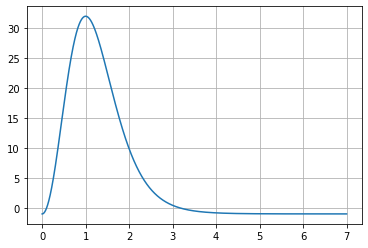

In [ ]:
M=np.arange(0, 7, 0.001) #arranging values for M
y=np.zeros(7000)
for i in range(7000):
  y[i]=mach(M[i], 0.025) #filling array with the values from mach function
  if mach(M[i],0.025)<0.0 and mach(M[i], 0.025)>-1e-2:
#checking if the function is near 0.
#If it is, then values of M there should be close to the actual value of M
#it was done in order to find a lower boundary guess and an upper boundary guess
    print('Value of Mach number =', round(M[i], 4), 'at y =', mach(M[i], 0.025))
plt.plot(M,y)
plt.grid()

In [ ]:
#checking computed value of M (the actual value)
#as it could be seen that its value lays between 3 and 3.5
i, M, e = bsec(3, 3.5, 0.025, 1e-12,50)
print(M)

3.1681453521163974


**Plot 1**

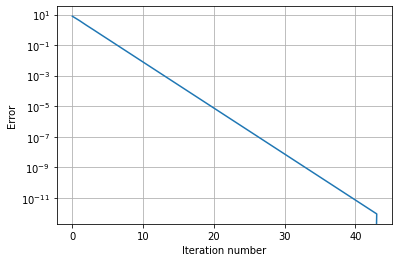

In [ ]:
plt.plot(i,e)
plt.xlabel("Iteration number")
plt.ylabel("Error")
plt.yscale("log")
plt.grid()

### **Part B**

In [ ]:
r=np.linspace(0.025, 0.5, 20) #making a uniformly distributed array of numbers between 0.025 and 0.5
M=np.linspace(0, 5, 20)
y=np.zeros(20)
for i in range(20):
  if r[i]<0.25: #supersonic values
    if mach(M[i],r[i])>=-1 and mach(M[i],r[i])<=1:
      n, m, e = bsec(1, 5, r[i], 1e-12,500) #bisecting between 1 and 5, because supersonic values are >1
      y[i]=m
    print(i+1,') M = ', round(m, 4), ', for r =', round(r[i],3))
  elif (r[i]>0.25): #subsonic values
    if mach(M[i],r[i])>=-1 and mach(M[i],r[i])<=1:
      n, m, e = bsec(0, 1, r[i], 1e-12,500) #bisecting between 0 and 1, because subsonic values are <1
      y[i]=m
    print(i+1,') M =', round(m, 4), ', for r =', round(r[i],3))
  elif(r[i]==0.25): #should be approximately 1
    n, m, e = bsec(0, 1, r[i], 1e-12,500)
    y[i]=m
    print(i+1,') M =', round(m, 4), ', for r =', round(r[i],3))

1 ) M =  3.1681 , for r = 0.025
2 ) M =  2.4043 , for r = 0.05
3 ) M =  2.0026 , for r = 0.075
4 ) M =  1.7369 , for r = 0.1
5 ) M =  1.5418 , for r = 0.125
6 ) M =  1.3897 , for r = 0.15
7 ) M =  1.2663 , for r = 0.175
8 ) M =  1.1634 , for r = 0.2
9 ) M =  1.0758 , for r = 0.225
10 ) M =  1.0 , for r = 0.25
11 ) M = 0.9337 , for r = 0.275
12 ) M = 0.8749 , for r = 0.3
13 ) M = 0.8225 , for r = 0.325
14 ) M = 0.7754 , for r = 0.35
15 ) M = 0.7328 , for r = 0.375
16 ) M = 0.6941 , for r = 0.4
17 ) M = 0.6587 , for r = 0.425
18 ) M = 0.6262 , for r = 0.45
19 ) M = 0.5963 , for r = 0.475
20 ) M = 0.5687 , for r = 0.5


**Plot 2**

Text(0, 0.5, 'Mach value (M)')

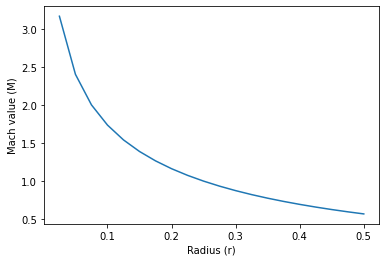

In [ ]:
plt.plot(r,y)
plt.xlabel("Radius (r)")
plt.ylabel("Mach value (M)")

### **Results**
From the plot 1 it can be seen that the number of iterations and error related logarithmically . The graph is in log scale, so there is a logarithmic decay of error as the number of iterations grows. Also, from the plot 2 it is possible to conclude that Mach Number and radius are also logarithmically dependent.
From the results of Part A, it can be seen that approximating values from the plot, where the function is near 0 is also a nice method for guessing the boundary conditions. From the Part B it can be seen that bisection method is actually a great techinque of finding a solution to the equation, since all of the values of M match the actual values to a very high extent.

### **Conclusion**
In this paper, I analyzed the bisection approach for the spherically symmetric flow of an ideal gas onto black holes. I calculated the Mach numbers $M$ for various radiuses $r$. The graphics also demonstrated the relationship between the number of iterations and the error value.
Overall, the assesment was succesfull and the method is proved to be reliable.